In [7]:
from classy import Class
import matplotlib.pyplot as plt
import numpy as np

----
## Vario omega_b
----

In [8]:
# valore vero 0.0223828
omega_b_arr = np.arange(0.0073828,0.0423828, 0.005)
l = len(omega_b_arr)
omega_b_arr = [round(num, 7) for num in omega_b_arr]

In [9]:
LambdaCDM_arr = []
# creo il modello Lambda-CDM e imposto i parametri di input
for i in range (l):
    LambdaCDM = Class()
    LambdaCDM.set({'omega_b':omega_b_arr[i],'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,'N_ncdm':1, 'm_ncdm':0.06})
    LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    # lancio la classe
    LambdaCDM.compute()
    LambdaCDM_arr.append(LambdaCDM)

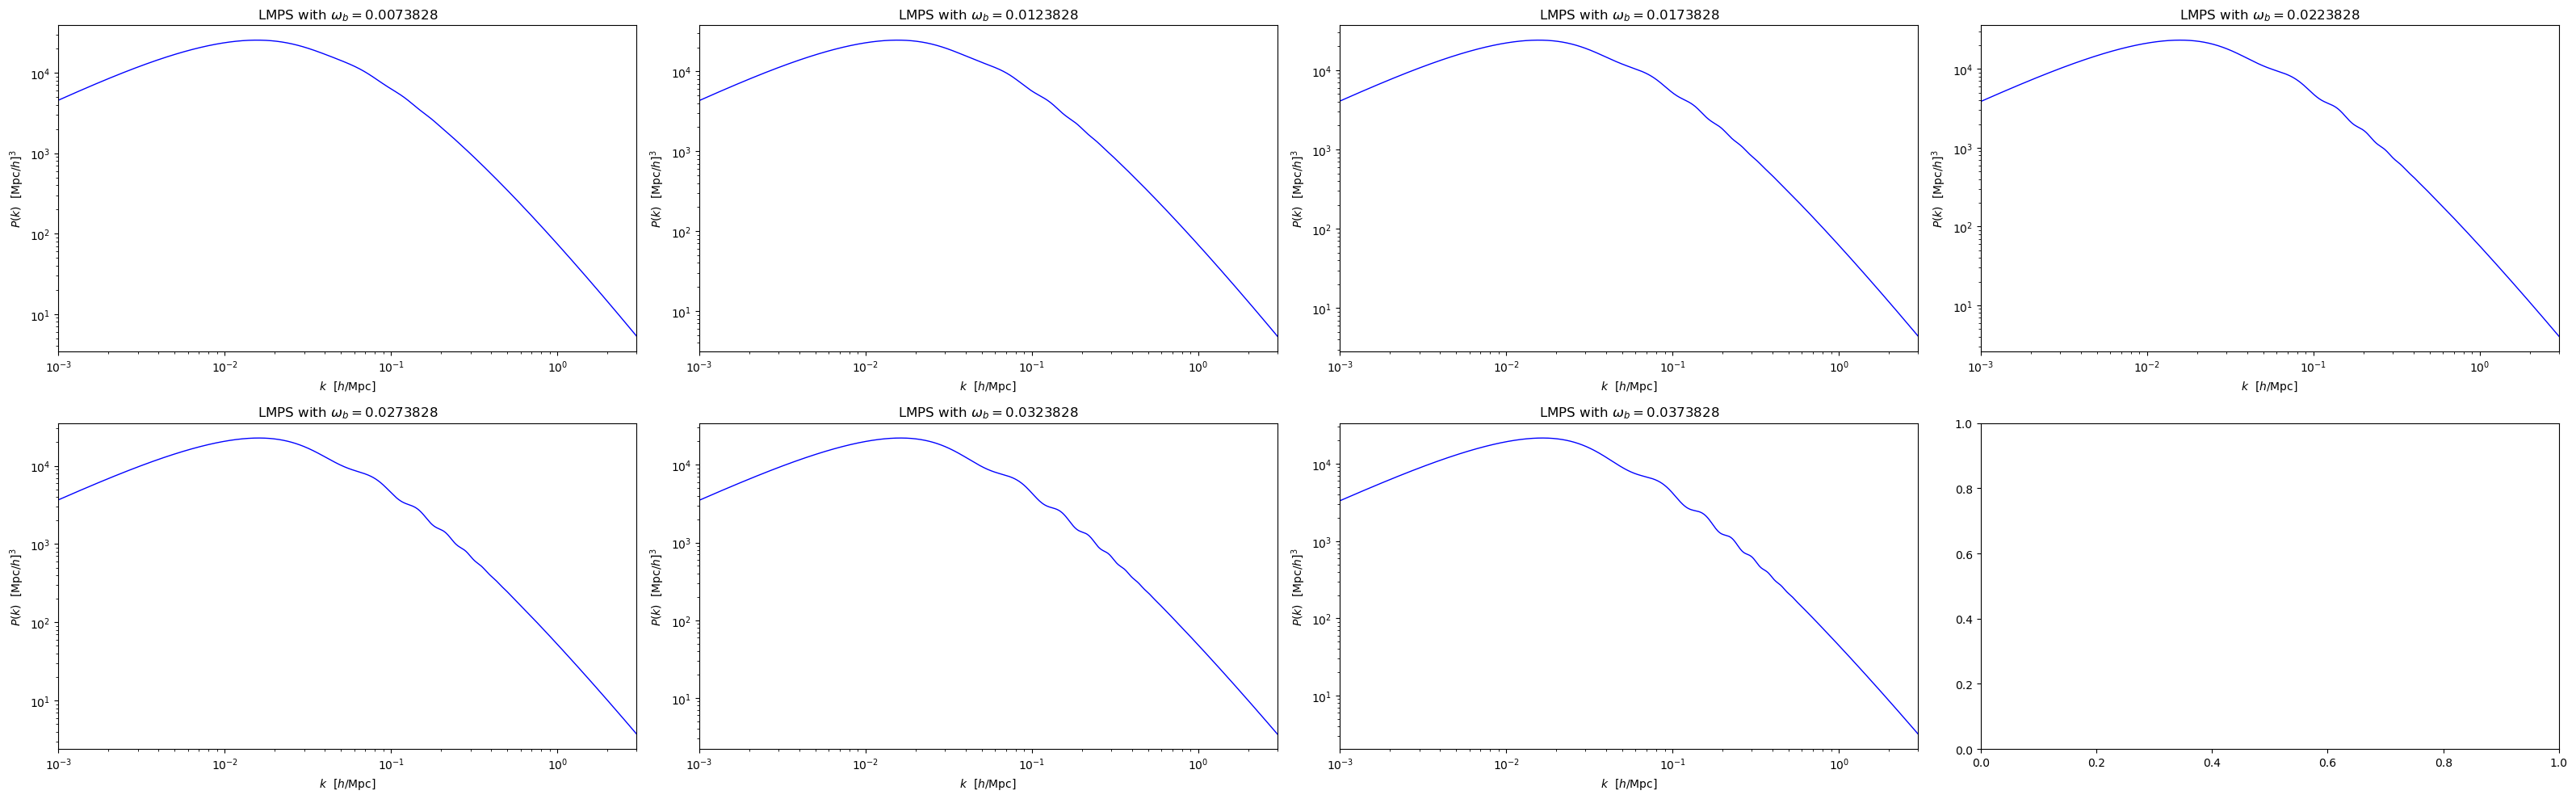

In [10]:
fig, axs = plt.subplots(2, 4, figsize=(32, 10))
plt.subplots_adjust(top=1.1)  
for i, ax in enumerate(axs.flatten()):
    if i >= l:
        break  # Esce dal ciclo dopo il settimo plot
    kk = np.logspace(-3, np.log10(3), 1000)
    Pk = []
    h = LambdaCDM_arr[i].h()
    for k in kk:
        Pk.append(LambdaCDM_arr[i].pk(k * h, 0.) * h ** 3)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(kk[0], kk[-1])
    ax.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    ax.set_ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    val = round(LambdaCDM_arr[i].omega_b(),7)
    ax.set_title('LMPS with $\u03C9_b=$' + str(val))
    ax.plot(kk, Pk, 'b-', lw=1)

plt.tight_layout()
plt.show()


----
## Vario omega_c
----

In [11]:
# valore vero 0.1201075
omega_c_arr = np.arange(0.0601075,0.2001075,0.02)
l = len(omega_c_arr)
omega_c_arr = [round(num, 7) for num in omega_c_arr]

In [12]:
LambdaCDM_arr = []
# creo il modello Lambda-CDM e imposto i parametri di input
for i in range (l):
    LambdaCDM = Class()
    LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':omega_c_arr[i],'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,'N_ncdm':1, 'm_ncdm':0.06})
    LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    # lancio la classe
    LambdaCDM.compute()
    LambdaCDM_arr.append(LambdaCDM)

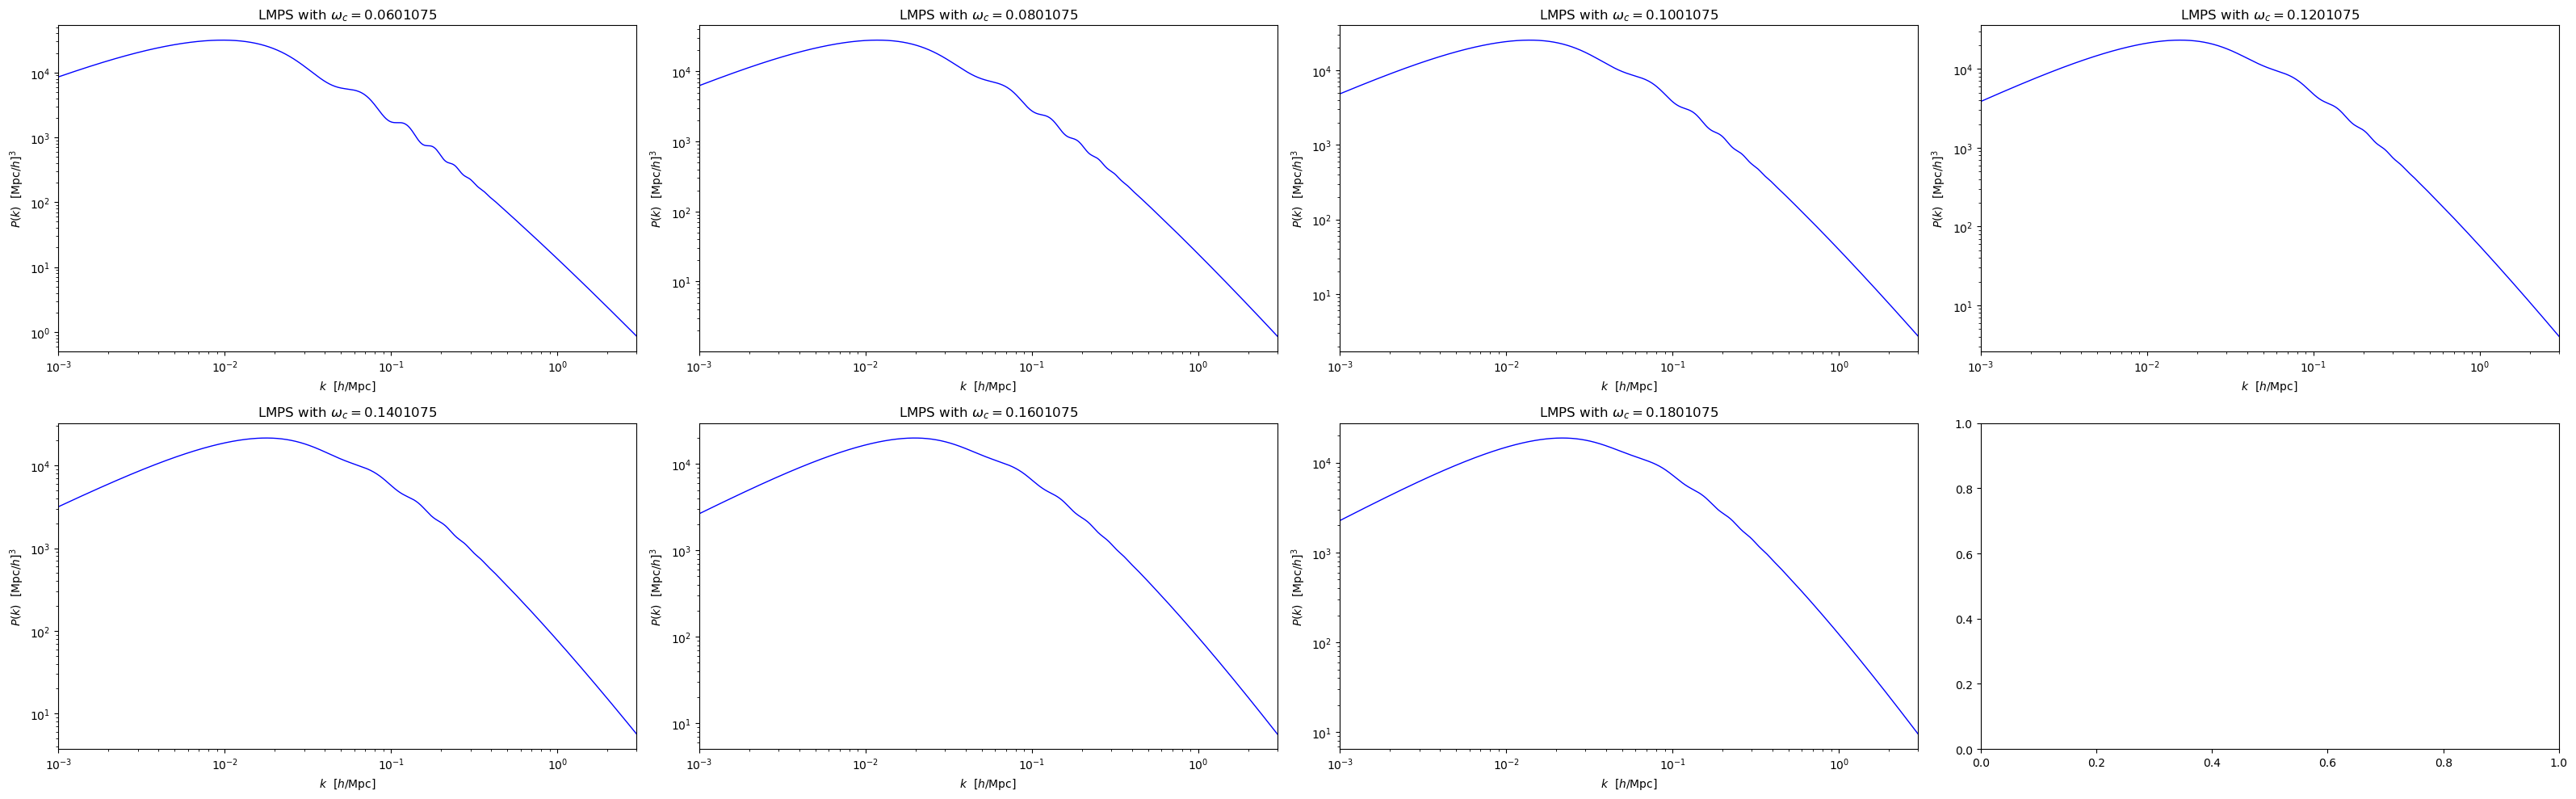

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(32, 10))
plt.subplots_adjust(top=1.1)  
for i, ax in enumerate(axs.flatten()):
    if i >= l:
        break  # Esce dal ciclo dopo il settimo plot
    kk = np.logspace(-3, np.log10(3), 1000)
    Pk = []
    h = LambdaCDM_arr[i].h()
    for k in kk:
        Pk.append(LambdaCDM_arr[i].pk(k * h, 0.) * h ** 3)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(kk[0], kk[-1])
    ax.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    ax.set_ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    ax.set_title('LMPS with $\u03C9_c=$' + str(omega_c_arr[i]))
    ax.plot(kk, Pk, 'b-', lw=1)

plt.tight_layout()
plt.show()

----
## Vario m_nu
----

In [14]:
# valore stimato 0.6
mu_nu_arr = np.arange(0.06,1.27,0.2)
l = len(mu_nu_arr)
mu_nu_arr = [round(num, 2) for num in mu_nu_arr]

[0.06, 0.26, 0.46, 0.66, 0.86, 1.06, 1.26]


In [15]:
LambdaCDM_arr = []
# creo il modello Lambda-CDM e imposto i parametri di input
for i in range (l):
    LambdaCDM = Class()
    LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,'N_ncdm':1, 'm_ncdm':mu_nu_arr[i]})
    LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    # lancio la classe
    LambdaCDM.compute()
    LambdaCDM_arr.append(LambdaCDM)

In [34]:
# creo i grafici dei LMPS e dei rapporti tra quelli con diverse masse di neutrino e quello con m_nu=0.06 eV
Pk_arr = []
Pk_ratio_arr = []
kk = np.logspace(-3, np.log10(3), 1000)
for i in range (l):
    Pk = []
    Pk_ratio = []
    h = LambdaCDM_arr[i].h()
    for k in kk:
        Pk.append(LambdaCDM_arr[i].pk(k * h, 0.) * h ** 3)
        Pk_ratio.append((LambdaCDM_arr[i].pk(k * h, 0.) * h ** 3)/(LambdaCDM_arr[0].pk(k * h, 0.) * h ** 3))
    Pk_arr.append(Pk)
    Pk_ratio_arr.append(Pk_ratio)
        
            

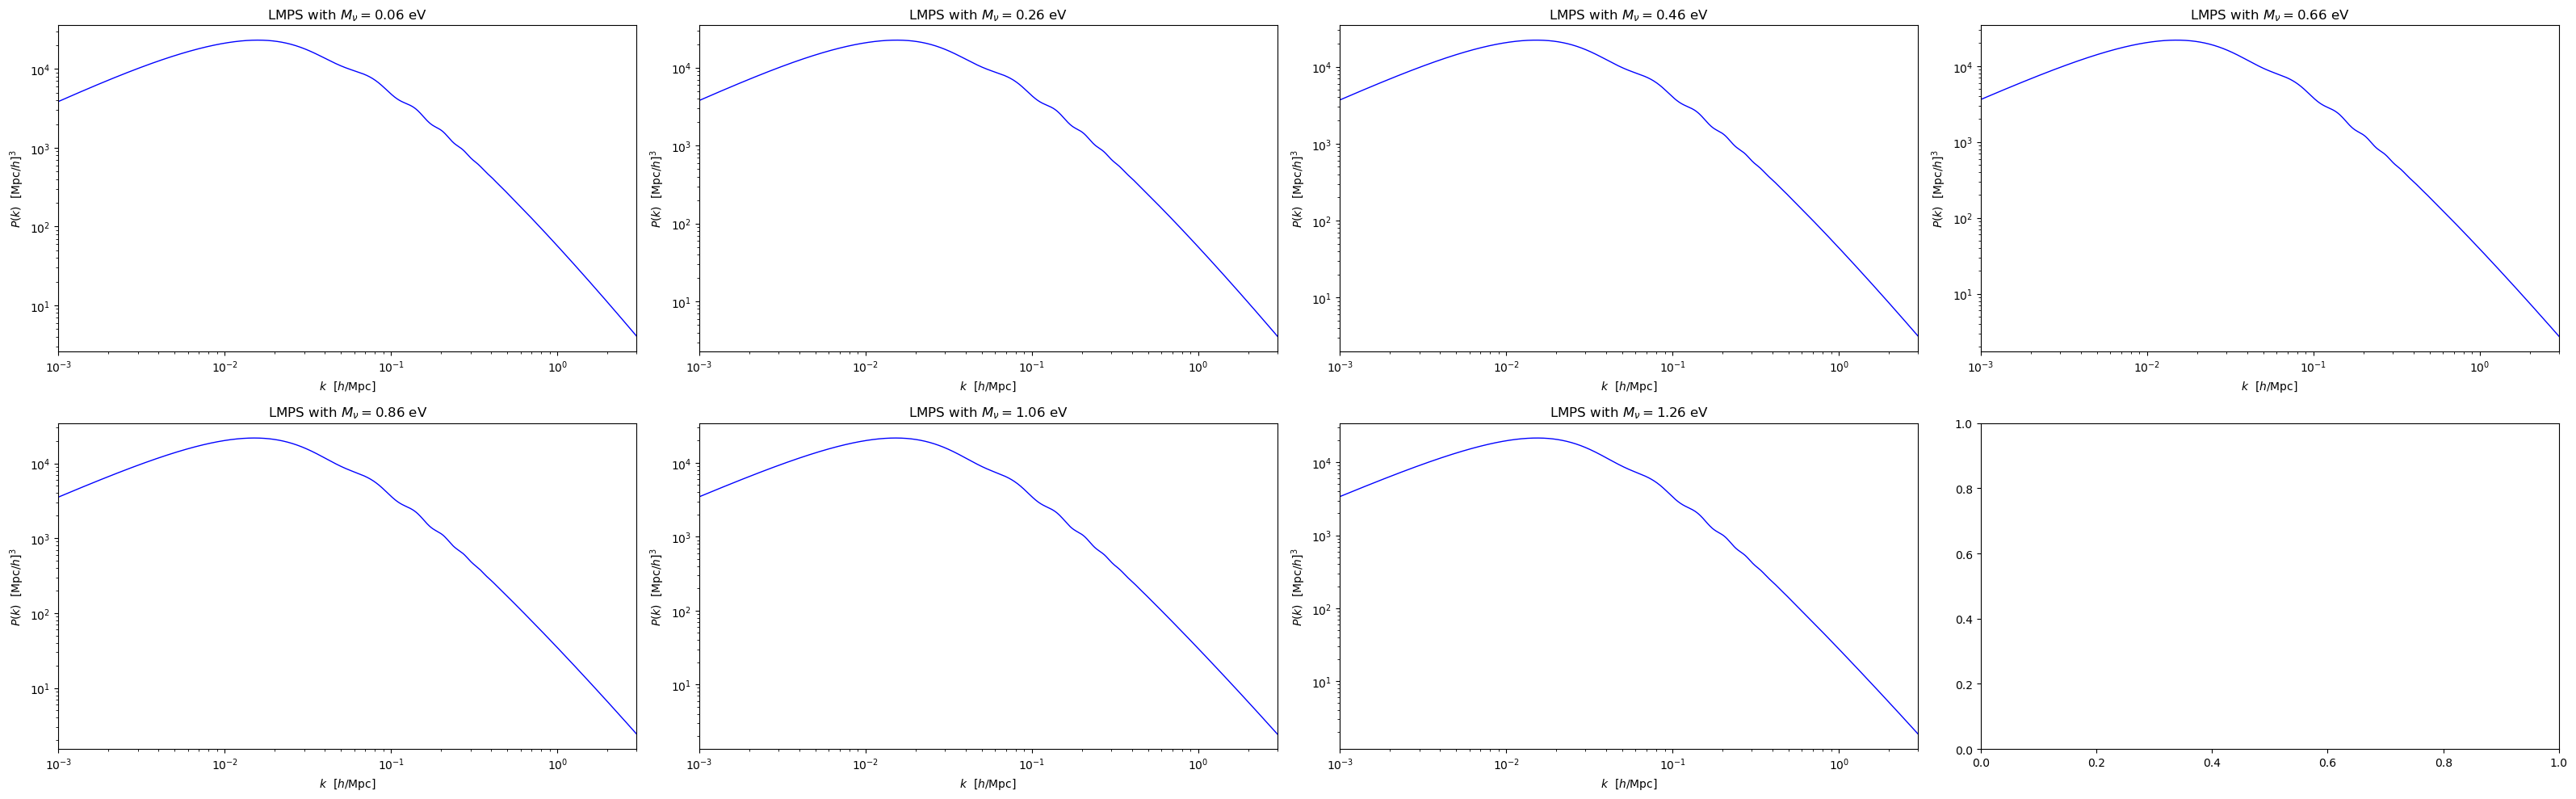

In [31]:
fig, axs = plt.subplots(2, 4, figsize=(32, 10))
plt.subplots_adjust(top=1.1)  
for i, ax in enumerate(axs.flatten()):
    if i >= l:
        break  # Esce dal ciclo dopo il settimo plot
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(kk[0], kk[-1])
    ax.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    ax.set_ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    ax.set_title('LMPS with $M_\u03BD=$' + str(mu_nu_arr[i])+' eV')
    ax.plot(kk, Pk_arr[i], 'b-', lw=1)

plt.tight_layout()
plt.show()

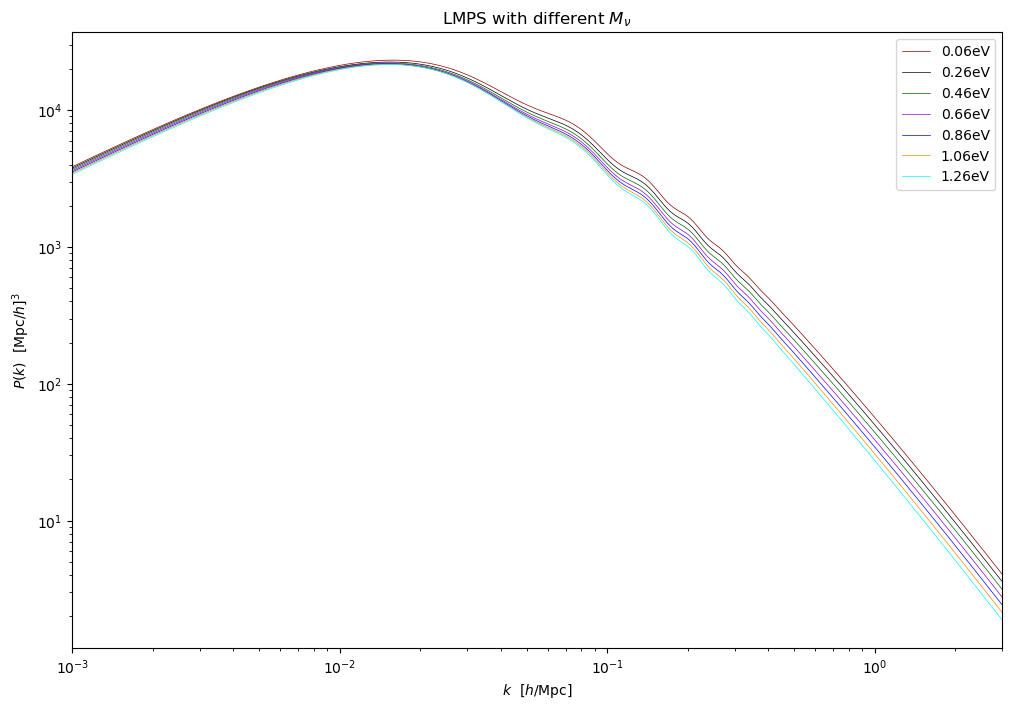

In [32]:
colours = ['darkred','k','darkgreen','darkviolet','b','darkorange','cyan']
fig, ax = plt.subplots(figsize=(12,8))
for i in range (l):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(kk[0], kk[-1])
    ax.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    ax.set_ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    ax.set_title('LMPS with different $M_\u03BD$')
    #lab = str(mu_nu_arr[i])+ 'eV'
    ax.plot(kk, Pk_arr[i], color=colours[i], lw=0.5, label=str(mu_nu_arr[i])+ 'eV')
    ax.legend()
plt.show()


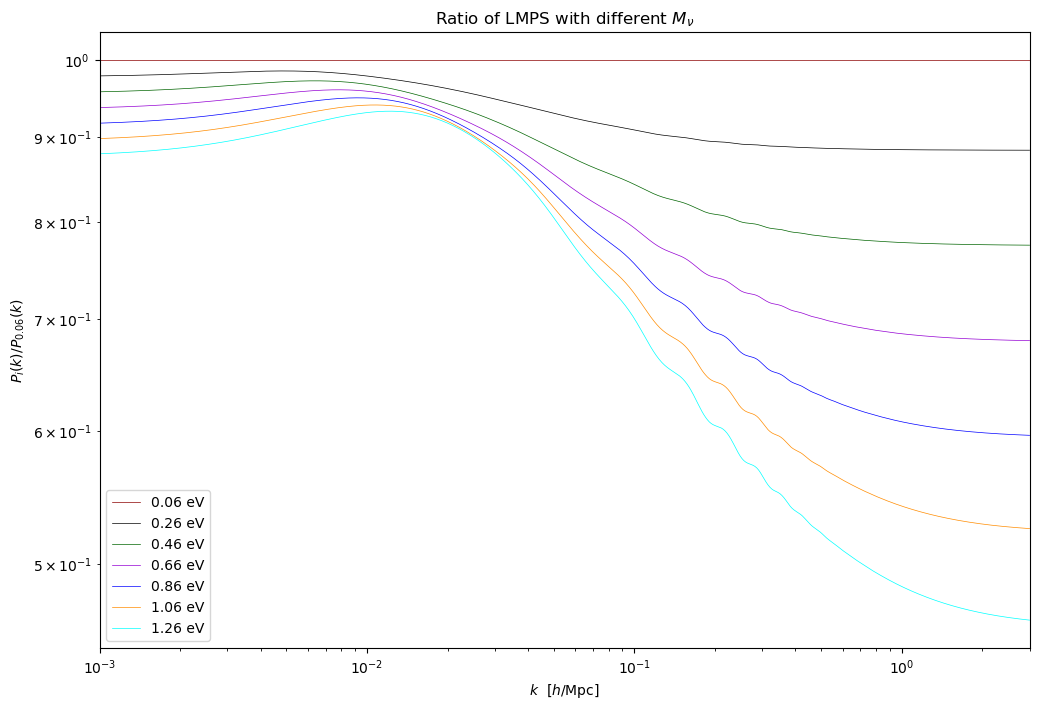

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
for i in range (l):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(kk[0], kk[-1])
    ax.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    ax.set_ylabel(r'$P_i(k)/P_{0.06}(k)$')
    ax.set_title('Ratio of LMPS with different $M_\u03BD$')
    #lab = str(mu_nu_arr[i])+ 'eV'
    ax.plot(kk, Pk_ratio_arr[i], color=colours[i], lw=0.5, label=str(mu_nu_arr[i])+ ' eV')
    ax.legend()
plt.show()